In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("C:/Users/soori/Desktop/face class/Data sci-Projects/project 2 Machine learnig/house_price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<AxesSubplot:xlabel='area', ylabel='price'>

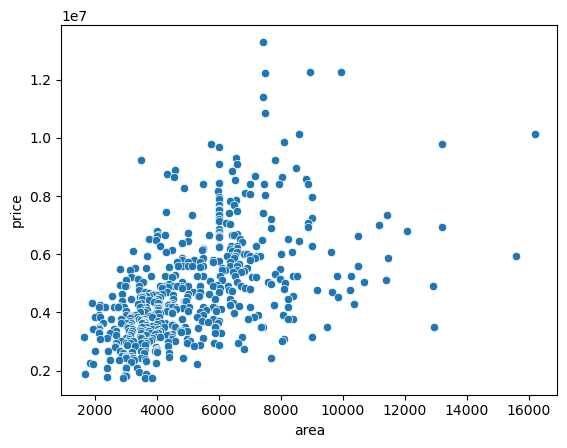

In [7]:
import seaborn as sns
sns.scatterplot(x='area',y='price',data=df)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


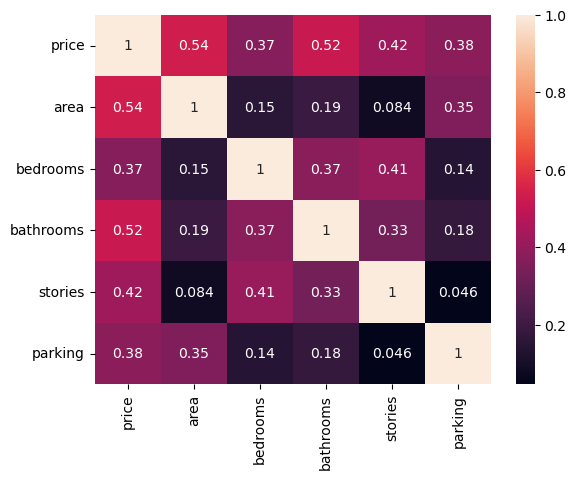

In [9]:
sns.heatmap(df.corr(),annot = True);

In [10]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [11]:
x = df.iloc[:,1:5]
y = df.iloc[:,0].values

In [12]:
x[:5]

,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2


In [13]:
y[:5]

array([13300000, 12250000, 12250000, 12215000, 11410000], dtype=int64)

In [14]:
x.shape,y.shape

((545, 4), (545,))

In [15]:
x.shape,y.shape

((545, 4), (545,))

In [16]:
x[:5]

,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2


In [17]:
y[:5]

array([13300000, 12250000, 12250000, 12215000, 11410000], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [20]:
x[:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 4), (109, 4), (436,), (109,))

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(x_test)
y_pred[:5]

array([4080369.90638061, 5761744.2579716 , 4130644.91225941,
       6899050.5108914 , 4208775.258233  ])

In [25]:
print(regressor.coef_)

[846991.21735672 192625.19989396 633453.25737718 445558.45387255]


In [26]:
print(regressor.intercept_)

4781922.655326778


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5470286769926767

In [28]:
x_test[:5]

array([[-0.53065597,  0.04727831, -0.57018671,  0.22441013],
       [ 2.06141663,  0.04727831, -0.57018671, -0.92939666],
       [-0.77971632,  1.40341936, -0.57018671,  0.22441013],
       [ 3.71259454, -1.30886273, -0.57018671, -0.92939666],
       [-0.68747175,  1.40341936, -0.57018671,  0.22441013]])

In [29]:
y_test[:5]

array([4585000, 6083000, 4007500, 6930000, 2940000], dtype=int64)

In [30]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [31]:
rmse = np.sqrt(mse)
print(rmse)

1142473.2372193115


In [32]:
#using SVM:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df=pd.read_csv("C:/Users/soori/Desktop/face class/Data sci-Projects/project 2 Machine learnig/house_price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [36]:
x=df.iloc[:,1:11]
y=df.iloc[:,0].values

In [37]:
x[:5]

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
0,7420,4,2,3,2,1,0,0,0,1
1,8960,4,4,4,3,1,0,0,0,1
2,9960,3,2,2,2,1,0,1,0,0
3,7500,4,2,2,3,1,0,1,0,1
4,7420,4,1,2,2,1,1,1,0,1


In [38]:
y[:5]

array([13300000, 12250000, 12250000, 12215000, 11410000], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [41]:
x_train[:5]

array([[-1.55021716, -1.35446064, -0.57931017,  0.18542633, -0.82872033,
         0.39056673, -0.4706983 , -0.70710678, -0.20851441, -0.71492035],
       [ 0.09760377,  0.06251357, -0.57931017, -0.94373698, -0.82872033,
        -2.56038192, -0.4706983 , -0.70710678, -0.20851441,  1.39875721],
       [-1.05087748, -1.35446064, -0.57931017, -0.94373698, -0.82872033,
        -2.56038192, -0.4706983 , -0.70710678, -0.20851441, -0.71492035],
       [-0.85114161,  0.06251357, -0.57931017,  0.18542633,  1.44816784,
         0.39056673, -0.4706983 ,  1.41421356, -0.20851441, -0.71492035],
       [ 0.19747171,  0.06251357, -0.57931017,  1.31458963,  0.30972376,
         0.39056673, -0.4706983 , -0.70710678, -0.20851441, -0.71492035]])

In [42]:
x_test[:5]

array([[-0.55153781,  0.06251357, -0.57931017,  0.18542633,  0.30972376,
         0.39056673, -0.4706983 , -0.70710678, -0.20851441, -0.71492035],
       [ 2.25475117,  0.06251357, -0.57931017, -0.94373698,  1.44816784,
         0.39056673, -0.4706983 ,  1.41421356, -0.20851441, -0.71492035],
       [-0.82118123,  1.47948777, -0.57931017,  0.18542633, -0.82872033,
         0.39056673, -0.4706983 , -0.70710678, -0.20851441,  1.39875721],
       [ 4.04238721, -1.35446064, -0.57931017, -0.94373698,  0.30972376,
         0.39056673, -0.4706983 ,  1.41421356,  4.79583152, -0.71492035],
       [-0.7213133 ,  1.47948777, -0.57931017,  0.18542633, -0.82872033,
        -2.56038192, -0.4706983 , -0.70710678, -0.20851441, -0.71492035]])

In [43]:
from sklearn.svm import SVC

In [44]:
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [45]:
y_pred=classifier.predict(x_test)

In [46]:
classifier.score(x_test,y_test)

0.0072992700729927005

In [47]:
model_C=SVC(C=1)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

0.014598540145985401

In [48]:
model_C=SVC(C=2)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

0.014598540145985401

In [49]:
model_g=SVC(gamma=1)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.0364963503649635

In [50]:
model_poly = SVC(kernel='poly',degree=5)
model_poly.fit(x_train, y_train)
model_poly.score(x_test, y_test)

0.0072992700729927005

In [51]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators=20,random_state=0)

In [53]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [54]:
rf_pred = rf.predict(x_test)
rf_pred[:10]

array([3320450., 5472600., 3590300., 5965400., 3161900., 7138950.,
       4290650., 3761100., 3263400., 8536297.])

In [55]:
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
r2_score(y_test,rf_pred)*100

55.12488505135644

In [57]:
mean_squared_error(y_test,rf_pred)

1385063914826.6665